# Áp dụng mô hình Logistic regression trong bài toán phân loại chữ số viết tay.
Bộ cơ sở dữ liệu MNIST, bộ cơ sở dữ liệu về chữ số viết tay.

MNIST gồm 2 tập :
1. training set (60 nghìn mẫu khác nhau từ 0 đến 9), test set gồm 10 nghìn mẫu khác nhau.Tất cả đều được gán nhãn.
2. Mỗi bức ảnh là một ảnh xám (chỉ có 1 channel) kích thước 28.28 (tổng cộng 784 pixel). Mỗi pixel mang giá trị từ 0 đến 255 (đen -> trắng).


Trong bài toán này, ta chỉ phân loại hai chữ số đó là chữ số 0 và chữ số 1.

Cài đặt thư viện và tải dữ liệu.

In [1]:
%load_ext autoreload
%autoreload 2
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib.backends.backend_pdf import PdfPages

Dữ liệu

In [2]:
X_all, y_all = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X_all.shape)
print(y_all.shape)

(70000, 784)
(70000,)


In [3]:
print(X_all[0])
print(y_all[0:5])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Trong tập dữ liệu, lấy tất những số có giá trị 0 và 1.

In [4]:
X0 = X_all[np.where(y_all== '0')[0]]
X1 = X_all[np.where(y_all== '1')[0]]
y0 = np.zeros(X0.shape[0])  
y1 = np.ones(X1.shape[0])
X  = np.concatenate((X0,X1), axis=0)
print(X.shape)
y  = np.concatenate((y0,y1), axis=0)
print(y.shape)

(14780, 784)
(14780,)


Chia dữ liệu thành hai phần train và test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(y_test)
print(y_test.shape)

[0. 1. 0. ... 0. 1. 1.]
(2956,)


In [6]:
model = LogisticRegression(C = 1e5) # C is inverse of lam 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [7]:
print("Dự đoán đầu ra",y_pred)


Dự đoán đầu ra [0. 1. 0. ... 0. 1. 1.]


Độ chính xác của mô hình

In [8]:
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred)))

Accuracy 99.80 %


Xem dữ liệu phân loại sai. Lấy những điểm phân loại sai rồi hiển thị.

In [9]:
mis = np.where((y_pred - y_test) !=0)[0]
print(mis)


[ 225 1573 1628 1920 2024 2834]


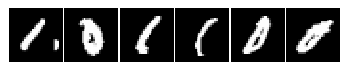

In [10]:
Xmis = X_test[mis, :]
from display_network import * 
filename = 'mnist_mis.pdf'
with PdfPages(filename) as pdf:
    plt.axis('off')
    A = display_network(Xmis.T, 1, Xmis.shape[0])
    f2 = plt.imshow(A, interpolation='nearest' )
    plt.gray()
    pdf.savefig(bbox_inches='tight')
    plt.show()

# Sử dụng model cho toàn bộ điểm dữ liệu.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=10000)
model1 = LogisticRegression(C = 1e5) # C is inverse of lam 
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print("Accuracy %.2f %%" % (100*accuracy_score(y_test, y_pred.tolist())))

Accuracy 92.36 %


c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
print(y_pred)

['6' '0' '2' ... '5' '1' '3']
